In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc

In [6]:
df=pd.read_csv('fake_bills.csv',delimiter=';')
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [7]:
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [9]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [10]:
df.fillna(df.median(numeric_only=True),inplace=True)
df.fillna('Unknown',inplace=True)

In [11]:
df.columns=df.columns.str.replace('[^a-zA-Z0-9_]','',regex=True)

In [14]:
le=LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col]=le.fit_transform(df[col])

In [16]:
from sklearn.model_selection import train_test_split
x=df.drop('is_genuine',axis=1)
y=df['is_genuine']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

0.9833333333333333
              precision    recall  f1-score   support

       False       1.00      0.95      0.98       110
        True       0.97      1.00      0.99       190

    accuracy                           0.98       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



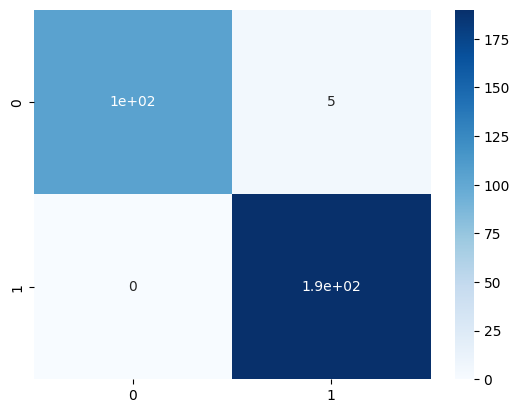

In [17]:
lda=LinearDiscriminantAnalysis()
xlda=lda.fit_transform(x,y)
lda.fit(xtrain,ytrain)
ypred=lda.predict(xtest)
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,cmap='Blues',annot=True)
plt.show()

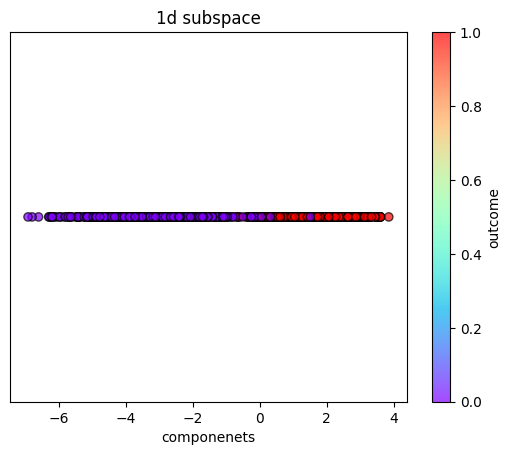

In [19]:
plt.scatter(xlda,np.zeros_like(xlda),c=y,cmap='rainbow',alpha=0.7,edgecolors='k')
plt.title('1d subspace')
plt.xlabel('componenets')
plt.yticks([])
plt.colorbar(label='outcome')
plt.show()

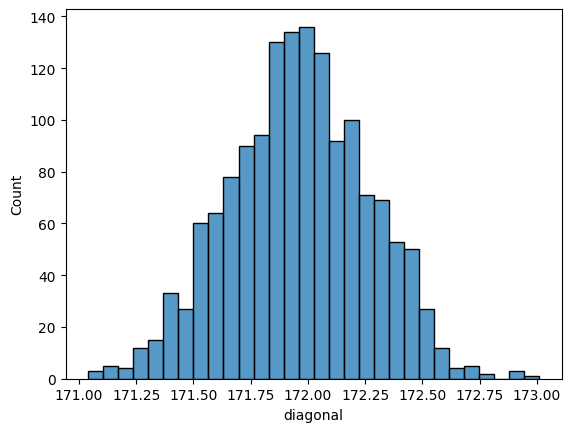

In [21]:
sns.histplot(df['diagonal'],bins=30)
plt.show()

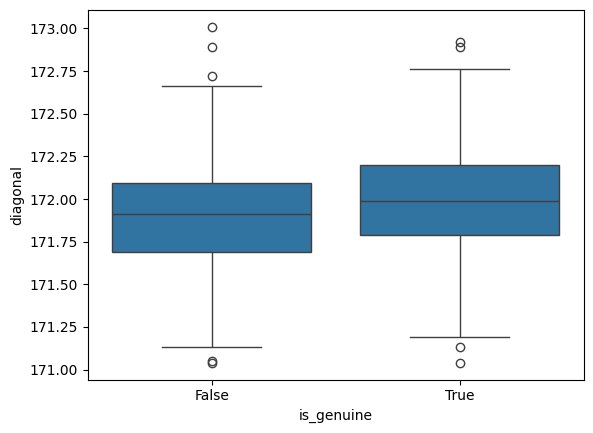

In [26]:
sns.boxplot(y='diagonal',x='is_genuine',data=df)
plt.show()

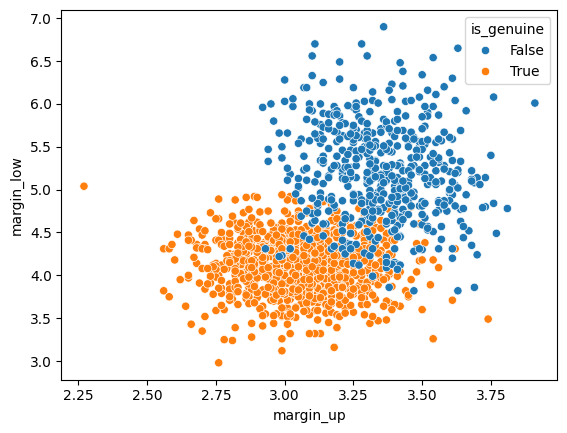

In [29]:
sns.scatterplot(x='margin_up',y='margin_low',hue='is_genuine',data=df)
plt.show()

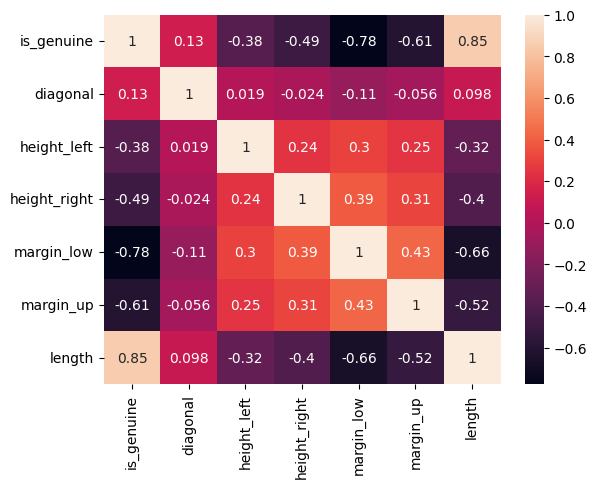

In [30]:
sns.heatmap(df.corr(),annot=True)
plt.show()

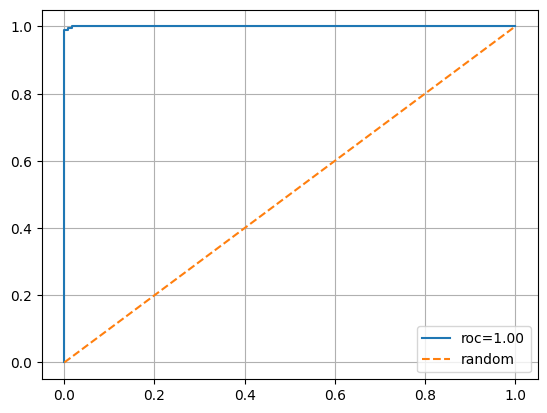

In [32]:
ypredproba=lda.predict_proba(xtest)[:,1]
fpr,tpr,_=roc_curve(ytest,ypredproba)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label=f'roc={roc_auc:.2f}')
plt.plot([0,1],[0,1],linestyle='--',label='random')
plt.legend()
plt.grid(True)
plt.show()